In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean = [0,0]
cov = [[1.0,0.45],
       [0.45,1.0]]
plot_pts = np.random.multivariate_normal(mean,cov,size=1000)

Below is what 1000 points with a correlation coefficient of 0.45 looks like. 

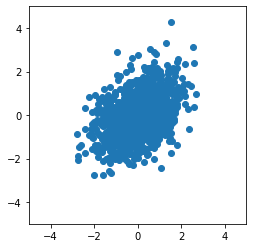

In [3]:
plt.scatter(plot_pts[:,0],plot_pts[:,1])
plt.xlim([-5,5]); plt.ylim([-5,5]); plt.gca().set_aspect('equal'); plt.show()

Furthermore, as I shared with you before, this is also the slope of the best fit line to the points. Below I generate 10000 points from the gaussian, and then using a simple gradient descent step with pytorch, find the optimal slope.

In [4]:
import torch

In [5]:
w = torch.tensor([1.], requires_grad=True) # Slope initialized to 1
pts = np.random.multivariate_normal(mean,cov,size=10000)
x_pts = torch.tensor(pts[:,0])
y_pts = torch.tensor(pts[:,1])
lr = 1e-3

In [6]:
for i in range(y_pts.size()[0]):
    y_pred = w*x_pts[i]
    loss = (y_pts[i]-y_pred).abs()
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()

In [7]:
w

tensor([0.4505], requires_grad=True)

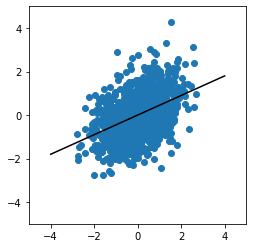

In [8]:
plt.scatter(plot_pts[:,0],plot_pts[:,1])
plt.plot([-4,4],[-4*w,4*w], 'k')
plt.xlim([-5,5]); plt.ylim([-5,5]); plt.gca().set_aspect('equal')
plt.show()